# Integral de Superficie de Campos Escalares

Uma aplicação da integral de superfície é calcular a massa de uma superfície dada a sua densidade. Essa aplicação é uma generalização do caso de integral de linha que estudamos a massa de um arame. A ideia é a mesma, partindo da parametrização da superfície, parametrizamos a função para que só tome valor em cima da superfície. Aí, temos que fazer uma mudança de variável. As variáveis antigas são as variáveis da função e as novas são os parâmetros da superfície.

## Preamble

In [1]:
import sympy as sp
import numpy as np
import sympy.vector as sv
import plotly.graph_objects as go
import pandas as pd
import av_utils as av


sp.init_printing()

R = sv.CoordSys3D('R')

t,s,x,y,z, rho, theta, phi = sp.symbols('t s x y z rho theta phi', real=True)

## Definição

Seja $f(x, y, z) : U \subset R^3 \rightarrow R$ seja uma função contínua, e seja $M$ uma superfície lisa
situada em $U$ que é parametrizada por $\vec r (u, v)$, onde $(u, v) \in R \subset R^2$ . A integral da superfície de $f(x, y, z)$ sobre $M$ é:
$$
\iint_M f(x,y,z) ds = \iint_R f(\vec r (u,v)) \|\frac{\partial \vec r}{\partial v} \times \frac{\partial \vec r}{\partial v}\| du\;dv = \iint_R f(\vec r (u,v)) \|\vec r_u \times \vec r_v\|
$$

Prestem atenção que essa integral é diferente das integrais que vocês estudaram no Calculo2. Lá vocês aprenderam resolver integrais tipo
$$
\iint_M f(x,y,z) \text{dA}
$$
A diferença se mostra nos elementos de área de cada integral. dS é o elemento de área da superfície, porem, dA é elemento da área do espaço de parâmetros. Na verdade, as integrais de superfície, depois da parametrização ficam uma integral
do tipo calculo2. Então, o processo de  arametrização ajuda a gente transforma uma integral de superfície em uma integral dupla comum.

## Um Exemplo

*Integrais de superfície podem ser difíceis no início, então, como um primeiro exemplo, vamos ver como configurar e resolver uma integral de superfície, deixando as partes duras para o Sympy.*

**Exemplo:** Calcule a integral de superfície de $f(x,y,z) = z(x^2 + y^2)$ sobre a metade superior da esfera de raio 1 centrada na origem.*

*Resolução:*

Lembre-se da aula anterior que uma das melhores maneiras de parametrizar uma superfície é geralmente descrevê-la em coordenadas cilíndricas
ou esféricas e depois converter a descrição novamente em coordenadas cartesianas. (Lembre-se, nossa parametrização final tem que ser em coordenadas cartesianas!) Neste caso particular, a descrição da metade superior da esfera é simplesmente $\rho =1$, onde $0 \le \theta \le 2\pi, \; 0 \le \phi \le \frac{\pi}{2} $.

Então se $\rho$ for constante, e os ângulos $\theta$ e $\phi$ serão nossos parâmetros. Usando a mudança de fórmulas de coordenadas, obtemos a seguinte parametrização (com os mesmos limites em $\theta$ e $\phi$ como antes):

In [2]:
def surf(theta, phi):
    rx = sp.cos(theta)*sp.sin(phi)*R.i
    ry = sp.sin(theta)*sp.sin(phi)*R.j
    rz = sp.cos(phi)*R.k
    return rx+ry+rz

In [3]:
surf(theta,phi)

In [4]:
av.plot3d_parametric_surface(surf(theta,phi),(theta, 0,2*np.pi), (phi, 0, np.pi/2))

Agora vamos a integrar a função $f(x, y, z) = (x^2 + y^2 ) z$ sobre a esfera. Às vezes as pessoas têm dificuldade em visualizar o que isso realmente significa. Suponha que nosso hemisfério seja composto de uma mistura de diferentes tipos de metais, e diferentes partes da esfera tenham uma densidade diferente, representada pela função $f(x,y,z)$. Aqui está um gráfico diferente da nossa superfície, onde o hemisfério é colorido de acordo com a função $f(x,y,z)$; tons mais claros indicam valores maiores de $f(x,y,z)$, enquanto áreas escuras na esfera representam áreas onde o
valor de $f(x,y,z)$ é menor.

In [5]:
av.plot3d_parametric_surface(surf(theta,phi),(theta, 0,2*np.pi), (phi, 0, np.pi/2), 
                         surfacecolor = (x**2 + y**2)*z,
                            title= '3D Surface with Density')

Assim, por exemplo, se $f(x,y,z)$ representa a densidade do material que compõe o hemisfério, as áreas mais claras são construídas com material muito mais denso que as áreas mais escuras. A integral de $f(x,y,z)$ sobre a superfície nos dará a massa total do hemisfério.

O primeiro passo para calcular a integral, como você pode ver olhando a definição acima ou em seu livro, é encontrar as derivadas parciais de nossa parametrização $f(\theta, \phi)$. 

In [6]:
dr_theta = surf(theta, phi).diff(theta)
dr_phi = surf(theta, phi).diff(phi)

Agora temos que calcular o produto vetorial das derivadas parciais e encontrar o comprimento do produto resultante. 

In [7]:
cross = dr_theta ^ dr_phi

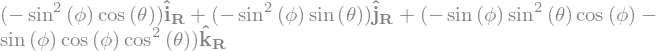

In [10]:
cross

In [8]:
mod = cross.magnitude().simplify()

In [9]:
mod

A outra parte do nosso integrando é $f (\vec r(\theta,\phi)$

In [11]:
def f(x,y,z):
    return (x**2 + y**2) * z

In [12]:
f(x,y,z)

In [13]:
surf_c = list(surf(theta,phi).components.values())
f_param = f(*surf_c)

In [14]:
f_param

Agora temos todos os ingredientes para calcular a integral de superficie

In [15]:
integrand = f_param * mod

In [16]:
integrand

In [17]:
sp.integrate(integrand, (theta, 0, 2*sp.pi), (phi,0, sp.pi/2))

## Donut e Cobertura de Chocolate

Agora chegamos à importante aplicação no mundo real : medindo o chocolate. Donut (rosquinha) é chamado de toro (torus) por matemáticos. É um objeto muito importante na matemática. O toro é a superfície de revolução de um circulo fora da
origem.
![donut](./images/torus.gif)

A sua equação paramétrica é dada por
$$
\vec r(\theta, \phi) = (r \cos(\phi)+R)\cos(\theta) \hat i + (r \cos(\phi) + R) \sin(\theta) \hat j + r \sin(\phi) \hat k
$$
Por exemplo o gráfico de um torus de raio $R=3$ e raio de circulo $r=1$ é

In [20]:
def donut(theta, phi, Rr=3, r=1):
    d_x = (r*sp.cos(phi)+Rr)*sp.cos(theta)*R.i
    d_y = (r*sp.cos(phi)+Rr)*sp.sin(theta)*R.j
    d_z = r*sp.sin(phi)*R.k
    return d_x + d_y + d_z

In [21]:
donut(theta,phi)

Aqui está a configuração do nosso exemplo. Suponhamos que queremos fazer um donut e depois o mergulhamos de cabeça para baixo em uma vasilha de chocolate amargo, então cobrimos a metade superior do donut com cobertura de chocolate
pegajoso. O chocolate na vasilha não é perfeitamente misturado, então o chocolate mais denso está se depositando no fundo da vasilha. O que isto significa é que o chocolate que acaba no topo do donut (lembre-se, é mergulhado de cabeça para
baixo) é mais denso do que o chocolate nas laterais. Queremos saber quanto chocolate está realmente lá. Nós vamos fazer isso estimando a densidade do revestimento de chocolate em cada ponto na metade superior do donut, e então integrando a função de densidade ao longo desta metade.
Do jeito que escolhemos a parametrização, o chocolate está na metade superior do toro, o que acontece exatamente com os pontos acima ou acima do plano **xy**, onde $z = 0$. Execute o próximo comando e gire a imagem da superfície na qual vamos
nos integrar. Usamos a mesma parametrização, mas agora $0 \le \phi \le \pi$ e $0 \le \theta \le 2\pi$

In [24]:
av.plot3d_parametric_surface(donut(theta, phi), (theta, 0, 2*np.pi),
                             (phi, 0, np.pi), title = 'Donut')

Suponha que a função de densidade seja $f (x, y, z) = (z + 1) \frac{gramas}{cm^2}$. Um grafico da superfície do chocolate fica assim

In [32]:
av.plot3d_parametric_surface(donut(theta, phi), (theta, 0, 2*np.pi),
                             (phi, 0, np.pi), title = 'Donut',
                            surfacecolor= -(z+1))

Ao contrário do exemplo anterior, os tons mais escuros aqui representam o chocolate mais denso (porque o nosso chocolate é puro, afinal). Agora que vimos todas as fotos bonitas, estamos prontos para calcular a massa do chocolate, integrando
$f(x,y,z)$ na metade superior do toro.

In [31]:
def f(x,y,z):
    return z +1 

dr_theta = donut(theta,phi).diff(theta)
dr_phi = donut(theta,phi).diff(phi)

cross = dr_theta ^ dr_phi

mod = cross.magnitude().simplify()

c_donut = list(donut(theta,phi).components.values())

f_param = f(*c_donut)

integrand = f_param * mod

mass = sp.integrate(integrand, (theta, 0, 2*sp.pi), (phi, 0, sp.pi))


sp.N(mass)

Então, com a nossa configuração, existem quase 97 gramas de chocolate nesta superfície. (Soa como um bom donut! kkkkk)

## Exercicio:

1- Calcule $\iint_S$ onde $S$ é a superfície cujo lado $S_1$ é dado pelo cilindro $x^2 + y^2 = 1$, cujo fundo $S_2$ é o disco $x^2 + y^2 \le 1$ no plano $z = 0$, e cujo topo $S_3$ é a parte do plano $z=1+x$ que está acima do $S_2$. (*resposta $(\frac{3}{2} +\sqrt 2)\pi$*)